In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def f(x, y):
    return x**2 + np.exp(x) + y**2 - x*y

def g(x, y):
    return x**2 + 2 * y**2

In [17]:
xs = np.linspace(-2, 2, 100)
ys = np.linspace(-2, 2, 100)

In [18]:
# Setup
alpha = 1.07
beta = 9.52
L = 14.67
x1 = (-1, 1)

In [19]:
def gamma1(L, T, x_opt, x1, beta, k):
    return np.linalg.norm([x_opt[0] - x1[0], x_opt[1] - x1[1]]) / (np.sqrt(T) * L + 1e-10)

def gamma2(L, T, x_opt, x1, beta, k):
    return 1 / beta

def gamma3(L, T, x_opt, x1, beta, k):
    return 2 / (alpha * (k + 1))

In [ ]:
def project_to_circle(x, y):
    norm = np.sqrt(x**2 + y**2)
    if norm == 0:
        return 0, 0  # or raise an error, depending on how you want to handle this case
    scale = np.sqrt(1.5) / norm
    return x * scale, y * scale


def project_to_square(x, y):
    return np.sign(x) * np.minimum(np.abs(x), 1), np.sign(y) * np.minimum(np.abs(y), 1)

def project_to_line(Ax, Ay, Bx, By, x, y):
    t = np.dot(np.array([Bx - Ax, By - Ay]), np.array([x - Ax, y - Ay]).reshape((-1, 1))) / np.linalg.norm([Bx - Ax, By - Ay]) ** 2
    if t <= 0:
        return Ax, Ay
    if t >= 1:
        return Bx, By
    
    return Ax + t * (Bx - Ax), Ay + t * (By - Ay)

def project_to_triangle(x, y):
    A = np.array([-1, -1])
    B = np.array([1.5, -1])
    C = np.array([-1, 1.5])
    P = np.array([x, y])

    if is_inside_triangle(x, y):
        return (x, y)  # No projection needed

    # Project onto all edges and select the closest valid projection
    projections = []
    for edge in [(A, B), (B, C), (C, A)]:
        Ax, Ay = edge[0]
        Bx, By = edge[1]
        proj = project_to_line(Ax, Ay, Bx, By, x, y)
        projections.append(proj)

    # Find the closest projection
    min_dist = float('inf')
    closest_proj = (x, y)
    for proj in projections:
        dist = np.linalg.norm(np.array(proj) - P)
        if dist < min_dist:
            min_dist = dist
            closest_proj = proj

    return closest_proj

def is_inside_triangle(x, y):
    v0 = np.array([1.5 - (-1), -1 - (-1)])  # Vector AC
    v1 = np.array([-1 - (-1), 1.5 - (-1)])  # Vector AB
    v2 = np.array([x - (-1), y - (-1)])     # Vector AP

    dot00 = np.dot(v0, v0)
    dot01 = np.dot(v0, v1)
    dot02 = np.dot(v0, v2)
    dot11 = np.dot(v1, v1)
    dot12 = np.dot(v1, v2)

    inv_denom = 1 / (dot00 * dot11 - dot01 * dot01)
    u = (dot11 * dot02 - dot01 * dot12) * inv_denom
    v = (dot00 * dot12 - dot01 * dot02) * inv_denom

    return (u >= 0) and (v >= 0) and (u + v <= 1)

def project(x, y, domain):
    if domain == "circle":
        return project_to_circle(x, y)
    if domain == "square":
        return project_to_square(x, y)
    if domain == "triangle":
        return project_to_triangle(x, y)

In [ ]:
def grad_f(x, y):
    return 2*x + np.exp(x) - y, 2*y - x


In [22]:
project_to_circle(2, 0)
project_to_square(3, 0)
project_to_line(1.5, -1, -1, 1.5, 1, 0)

project_to_triangle(-2, 1)

(np.float64(-1.0), np.float64(1.5))

In [23]:
def minimum(f):
    """Finds approximate minimum of f(x)"""
    xs = np.linspace(-1, 1, 1000)
    ys = np.linspace(-1, 1, 1000)
    X, Y = np.meshgrid(xs, ys)  
    Z = f(X, Y)  
    
    min_idx = np.unravel_index(np.argmin(Z), Z.shape)  
    bx, by, bz = X[min_idx], Y[min_idx], Z[min_idx]
    return bx, by, bz
    print(bx, by, bz)

In [53]:
minimum(f)

(np.float64(-0.43343343343343343),
 np.float64(-0.2172172172172172),
 np.float64(0.7891781013303545))

In [125]:
1 / beta

0.10504201680672269

In [ ]:
pts_x = []
pts_y = []

def pgd(x0, y0, domain, gamma_fn, fn, grad_fn):
    x, y = x0, y0
    
    x_opt = np.array([-0.43343343, -0.217217])
    
    for i in range(10):
        lr = gamma_fn(L, i, x_opt, np.array([x, y]), beta, i)
        # print(lr)
        dx, dy = grad_fn(x, y)
        x = x - lr * dx
        y = y - lr * dy
        
        x, y = project(x, y, domain)

        pts_x.append(x)
        pts_y.append(y)
    print(domain, x,y, fn(x,y))
    return x, y            

In [127]:
pgd(-1, 1, "circle", gamma2, f, grad_f)

0.10504201680672269
0.10504201680672269
0.10504201680672269
0.10504201680672269
0.10504201680672269
0.10504201680672269
0.10504201680672269
0.10504201680672269
0.10504201680672269
0.10504201680672269
circle -2.6120858521388275 1.3873409807472386 12.444942565139588


(np.float64(-2.6120858521388275), np.float64(1.3873409807472386))

In [108]:
x1, y1 = -1, 1
x_opt, y_opt, xy_opt = minimum(f)
k = 10
T = 10

def get_constraint_1():
    T = 10
    return L * np.linalg.norm([[x1 - x_opt], [y1 - y_opt]]) / np.sqrt(T)

def get_constraint_2():
    return (3 * beta * np.linalg.norm([[x1 - x_opt], [y1 - y_opt]])**2 + f(x1, y1) - xy_opt) / k

def get_constraint_3():
    return (2 * L**2) / (alpha * (T + 1))

Gamma 1 constraint

In [116]:
xopt, yopt, _ = minimum(f)
f(np.mean(pts_x), np.mean(pts_y)) - f(xopt, yopt), get_constraint_1()

(np.float64(0.8693657974406146), np.float64(6.228473997977243))

Gamma 2 constraint

In [94]:
f(pts_x[-1], pts_y[-1]) - xy_opt

np.float64(11.655764463809234)

In [120]:
f(pts_x[-1], pts_y[-1]) - xy_opt, get_constraint_2()

(np.float64(0.015169756242871979), np.float64(5.4061397970405585))

Gamma 3 constraint

In [123]:
param = np.sum([2 * i / (T * (T + 1)) * xi for i, xi in zip(range(1, T+1), pts_x)]), np.sum([2 * i / (T * (T + 1)) * yi for i, yi in zip(range(1, T+1), pts_y)])
print(param)
f(param[0], param[1]) - xy_opt, get_constraint_3()

(np.float64(-0.48503041810036407), np.float64(-0.3997484034469653))


(np.float64(0.027663524661820094), 36.56905692438402)

In [31]:
opts = []
x0, y0 = -1, 1
for d in ["circle", "square", "triangle"]:  
    print()
    for gamma in [gamma1, gamma2, gamma3]:
        x_opt, y_opt = pgd(x0, y0, d, gamma, f, grad_f)
        
        opts.append((x_opt, y_opt, f(x_opt, y_opt)))


circle -1.0385170675695883 -0.18622780382200058 1.2737769620251507
circle -2.6120858521388275 1.3873409807472386 12.444942565139588
circle -0.7143695306410957 -0.5103753407504934 0.8957108518105954

square -0.005540718663055069 -0.4417810044601094 1.1872279740169063
square -0.355701139323922 -0.08418420993529793 0.8043478575732265
square -0.432720522409009 -0.2164590692849873 0.7891770729084704

triangle 0.0005839144071258153 -0.34702810491912933 1.1212155661882663
triangle -0.355701139323922 -0.08418420993529793 0.8043478575732265
triangle -0.483326239099319 -0.285173275349636 0.7938249132797365


In [32]:
def euclidean(x, y, x_opt, y_opt):
    return np.linalg.norm([[x - x_opt], [y - y_opt]])

In [33]:
xo, yo, _ = minimum(f)
for x, y in zip(pts_x, pts_y):
    print(euclidean(x, y,xo, yo))

2.085884399131302
0.7813301840106178
0.6783089686713366
0.6159373140367522
0.5718774738118786
0.5381858031808111
0.5111320869154293
0.48867212291894785
0.4695677768133264
0.45301426555077867
13.417611550544407
0.824782571006983
0.7633971515847793
0.722679713912748
0.6924462995450167
0.6685804766224028
0.6489951092976506
0.6324826520628963
0.618280655695446
0.6058766772553601
31.413239112423767
24.00477552607911
18.335829810882597
13.998201914992107
10.679539103877374
8.140754575805826
6.198634022620759
4.712659571663364
3.5754414375235046
2.7057592967937496
10.900142855010921
0.8410909712766611
1.4437144509770194
0.8495042007753792
0.45237665927267695
0.4060256447929974
0.40603581987919224
0.40603736763199666
0.40603776489903964
0.40603789984165845
1.6332422640581892
0.914498398195182
0.7691077504100544
0.6863618613280555
0.6297514426653905
0.5873596479944085
0.5538352672120808
0.5263308961429536
0.5031587672604433
0.4832401782700145
0.947584720548022
0.6921863411472738
0.5268588290481

In [34]:
get_constraint_1()

np.float64(6.425764986208601)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

In [36]:
x = np.linspace(-2, 2, 100)  # 100 points from -5 to 5
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)      # Create a 2D grid
Z = f(X, Y)                   # Compute Z = f(X, Y) for each (x, y)

In [37]:
x_opt, y_opt, f(x_opt, y_opt)

(np.float64(-0.483326239099319),
 np.float64(-0.285173275349636),
 np.float64(0.7938249132797365))

In [38]:
len(opts)

9

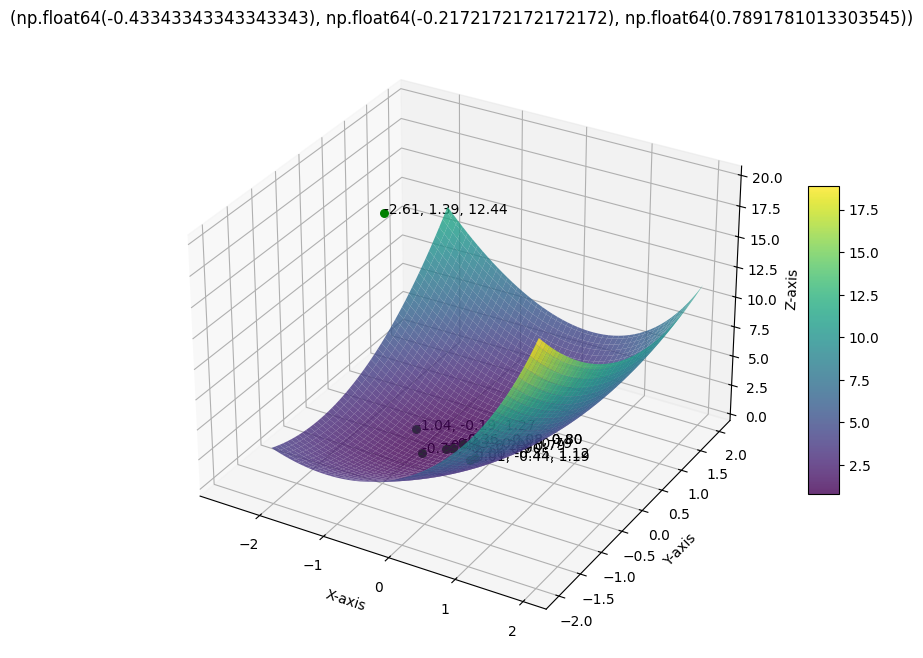

In [39]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
for x_opt, y_opt, z_opt in opts[:9]:
    ax.scatter(x_opt, y_opt, z_opt, c="green", s=30)
    try:
        ax.text3D(x_opt, y_opt, z_opt, f"{x_opt:.2f}, {y_opt:.2f}, {z_opt:.2f}")
    except: pass
    
# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f"{minimum(f)}")

# Add a colorbar
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

In [40]:
a = [[3.0, 10, 30],
     [0.1, 10, 35],
     [3, 10, 30],
     [0.1, 10, 35]]

c = [1.0, 1.2, 3.0, 3.2]

p = [[0.3689, 0.1170, 0.2673],
     [0.4699, 0.4387, 0.7479],
     [0.1091, 0.8732, 0.5547],
     [0.03815, 0.5743, 0.8828]]

In [41]:
def g(z):
    res = 0
    for i in range(len(c)):
        res += c[i] * np.exp(
            -np.sum([a[i][j] * (z[j] - p[i][j])**2 for j in range(3)])
        )
    return -res
    
g([.1, .2, .3])

np.float64(-0.7328944029304731)

In [42]:
def dgdz(z: list, k: int):
    res = 0
    for i in range(len(c)):
        res += 2 * c[i] * -1 * a[i][k] * (z[k] - p[i][k]) * np.exp(-np.sum([a[i][j] * (z[j] - p[i][j])** 2 for j in range(3)]))
    return -res

In [43]:
def project_to_cube(x, y, z):
    return np.clip(x, 0, 1), np.clip(y, 0, 1), np.clip(z, 0, 1)

In [44]:
def pgd_z(x0, y0, z0, fn):
    x, y, z = x0, y0, z0
    lr = .01
    
    for i in range(1000):
        lr *= 0.99

        dx, dy, dz = dgdz((x, y, z), 0), dgdz((x, y, z), 1), dgdz((x, y, z), 2)
        _x = x - lr * dx
        _y = y - lr * dy
        _z = z - lr * dz
        
        distance = np.linalg.norm([x - _x, y - _y, z - _z])
        if distance < 0.000001:
            print("Convergence @ iteration", i)
            break
        
        
        x, y, z = project_to_cube(_x, _y, _z)

    return x, y, z     

In [45]:
fmin = 0
min_dist = np.inf
x_opt, y_opt, z_opt = 0, 0, 0
for i in range(10):
    x0, y0, z0 = np.random.rand(3)

    x, y, z = pgd_z(x0, y0, z0, g)
    
    if i == 0:
        min_dist = np.abs(g([x,y,z])**2 - 3.86278214782076**2)
        fmin = g([x,y,z])
        x_opt, y_opt, z_opt = x, y, z
        
    else:
        if np.abs(g([x,y,z])**2 - 3.86278214782076**2) < min_dist:
            print(min_dist)
            fmin = g([x,y,z])
            min_dist = np.abs(g([x,y,z])**2 - 3.86278214782076**2)
            x_opt, y_opt, z_opt = x, y, z
    print(x,y,z, g([x,y,z]), min_dist)

Convergence @ iteration 510
0.3715351430217538 0.11755701937067979 0.2675706167998187 -1.0007890422233232 13.919507214488485
Convergence @ iteration 791
13.919507214488485
0.37020092071857175 0.5537867155127327 0.8531684080844367 -3.82964065912437 0.2549383435042216
Convergence @ iteration 806
0.4245885690909885 0.5532266912455335 0.8534978716124784 -3.812836351351129 0.2549383435042216
Convergence @ iteration 972
0.7302427884129854 0.20964332224899979 0.26792040003005324 -0.6215065505231164 0.2549383435042216
Convergence @ iteration 530
0.2549383435042216
0.13199429465476573 0.5554502037297951 0.8525608690435164 -3.8672549881538547 0.03457522187810902
Convergence @ iteration 778
0.3339820032626138 0.5541363838674981 0.8529740108800151 -3.839302379099628 0.03457522187810902
Convergence @ iteration 489
0.37099817158170045 0.11755764073228599 0.26757080060884175 -1.0007972414952482 0.03457522187810902
Convergence @ iteration 744
0.267116743767737 0.5547087360677841 0.8526928770066903 -3.

In [46]:
fmin, x_opt, y_opt, z_opt, min_dist

(np.float64(-3.8672549881538547),
 np.float64(0.13199429465476573),
 np.float64(0.5554502037297951),
 np.float64(0.8525608690435164),
 np.float64(0.03457522187810902))